# **Introdução à Ciência de Dados - Explorando Dados**
Vamos utilizar um dataset de listagem de filmes e shows de tv na Netflix. 
Esse dataset se encontra no Kaggle, onde é possível fazer o download.

Link do dataset: https://www.kaggle.com/shivamb/netflix-shows

Começamos importando os pacotes necessários:

In [1]:
import numpy as np 
import pandas as pd 

import os

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

Como estamos utilizando o próximo kaggle, basta ler o dataset passando o caminho do arquivo:

In [2]:
netflix_titles = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

---
# **Funções básicas**
**type():** Verificar o tipo da variável: 

In [3]:
type(netflix_titles)

pandas.core.frame.DataFrame

**.shape:** Retorna uma tupla representando a dimensionalidade do dataframe:

In [4]:
netflix_titles.shape

(8807, 12)

**.columns:** Nomes das colunas do dataframe

In [5]:
netflix_titles.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**.head:** Ver as primeiras n (5 por default) linhas do dataframe

In [6]:
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


----
# **Manipulando e explorando o Dataframe**



#### **Selecionando colunas específicas do dataframe**

In [7]:
netflix_titles_reduced = netflix_titles[['title','director','country','description']]
netflix_titles_reduced

,title,director,country,description
0,Dick Johnson Is Dead,Kirsten Johnson,United States,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,South Africa,"After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,NaN,To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,NaN,India,In a city of coaching centers known to train I...
...,...,...,...,...
8802,Zodiac,David Fincher,United States,"A political cartoonist, a crime reporter and a..."
8803,Zombie Dumb,NaN,NaN,"While living alone in a spooky town, a young g..."
8804,Zombieland,Ruben Fleischer,United States,Looking to survive in a world taken over by zo...
8805,Zoom,Peter Hewitt,United States,"Dragged from civilian life, a former superhero..."


#### **Verificando informações únicas**

In [8]:
# 1. Utilizando array
np.unique(netflix_titles.type.values)

array(['Movie', 'TV Show'], dtype=object)

In [9]:
# 2. Utilizando Pandas Series e retornando um array
netflix_titles["director"].unique() 

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [10]:
# 3. Utilizando Pandas Series 
netflix_titles["director"].drop_duplicates() 

0                     Kirsten Johnson
1                                 NaN
2                     Julien Leclercq
5                       Mike Flanagan
6       Robert Cullen, José Luis Ucha
                    ...              
8792                           Mu Chu
8798          Chandra Prakash Dwivedi
8801                  Majid Al Ansari
8805                     Peter Hewitt
8806                      Mozez Singh
Name: director, Length: 4529, dtype: object

#### **Agrupando dados**

In [11]:
group_column = "release_year"
netflix_titles.groupby(group_column)[group_column].count() #.reset_index(name = "count").sort_values(by="count", ascending=False)

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, Length: 74, dtype: int64

In [12]:
group_column = "country"
netflix_titles.groupby(group_column)[group_column].count().reset_index(name = "count").sort_values(by="count", ascending=False)

,country,count
603,United States,2818
251,India,972
506,United Kingdom,419
319,Japan,245
435,South Korea,199
...,...,...
281,"Ireland, Canada, Luxembourg, United States, Un...",1
282,"Ireland, Canada, United Kingdom, United States",1
283,"Ireland, Canada, United States, United Kingdom",1
284,"Ireland, France, Iceland, United States, Mexic...",1


----
## **Utilizando a visualização na análise dos dados**

#### **Agrupando tipos**

In [13]:
netflix_titles['type'].value_counts() # .plot(kind='pie',autopct='%1.0f%%')

Movie      6131
TV Show    2676
Name: type, dtype: int64

#### **Verificando valores faltantes**

<AxesSubplot:title={'center':'Missing Values'}>

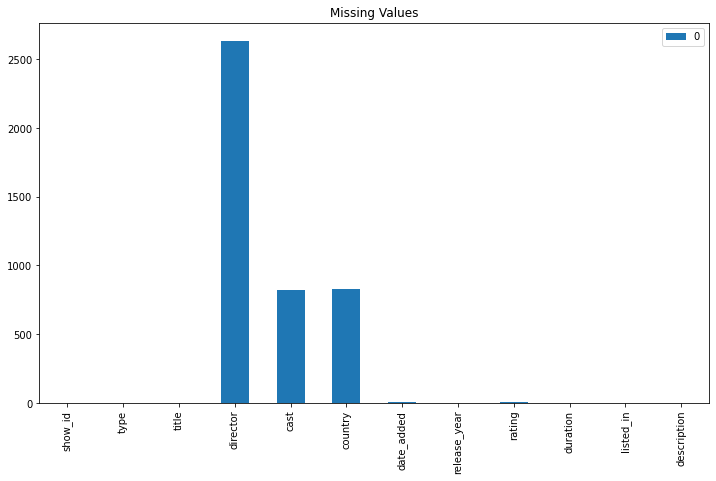

In [14]:
missing = netflix_titles.isnull().sum().to_frame()
missing.plot(title="Missing Values", figsize=(12,7), kind="bar")

#### **Limpando e preenchendo os dados**

In [15]:
raw_data = netflix_titles.copy()
raw_data['country'] = raw_data['country'].fillna('NA')
raw_data['rating'] = raw_data['rating'].fillna('NA') 
raw_data['director'] = raw_data['director'].fillna('NA')
df = raw_data.reset_index()

#### **Buscando por tendências**

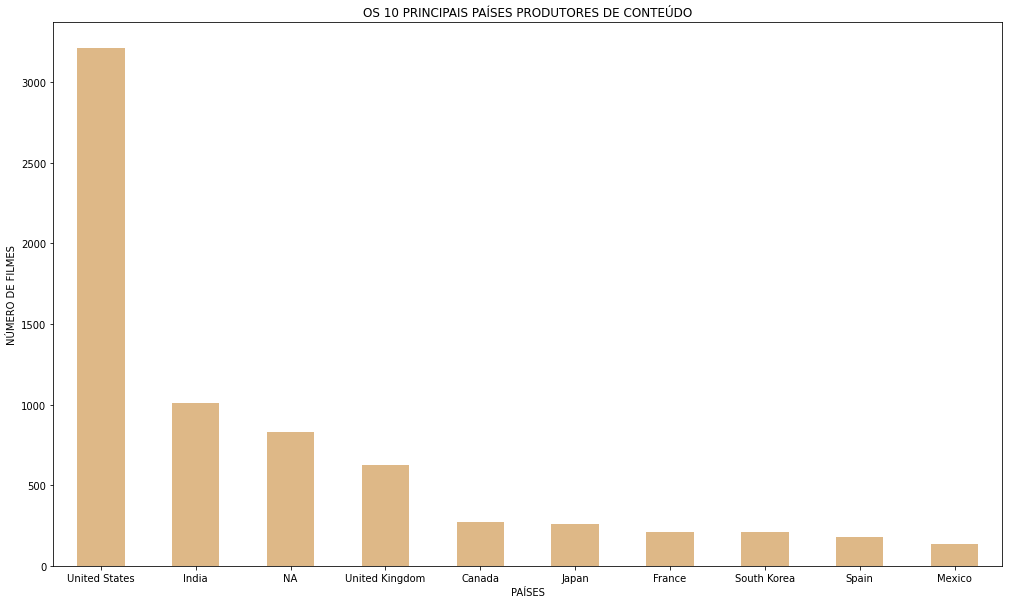

In [16]:
df['country'] = df['country'].apply(lambda x: x.split(",")[0])
cont = df.country.value_counts().head(10)
plt.figure(figsize = (17, 10))
cont.plot.bar(color = 'burlywood' )
plt.xticks(rotation = 0)
plt.xlabel("PAÍSES")
plt.ylabel("NÚMERO DE FILMES")
plt.title("OS 10 PRINCIPAIS PAÍSES PRODUTORES DE CONTEÚDO")
plt.show()

In [17]:
fig = px.treemap(df, path=[px.Constant('type'),'type','country'], color='country')
fig.show()

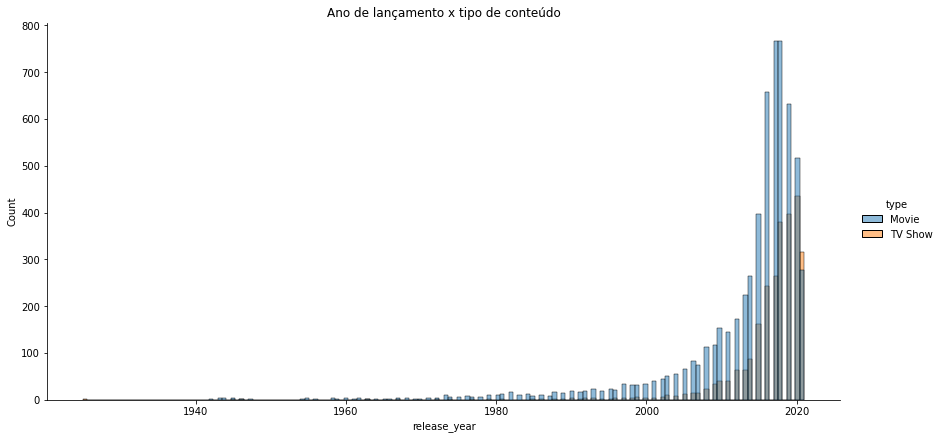

In [18]:
sns.displot(df, x='release_year', hue='type', height=6, aspect=2)
plt.title('Ano de lançamento x tipo de conteúdo')
plt.show()